# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = (r"C:\Users\Artsy\Desktop\PyBer_Analysis\Resources\city_data.csv")
ride_data_to_load = (r"C:\Users\Artsy\Desktop\PyBer_Analysis\Resources\ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
per_city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
per_city_ride_count 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
per_city_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
per_city_driver_count 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
per_city_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
per_city_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_city = per_city_total_fare / per_city_ride_count
average_fare_per_city

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = per_city_total_fare / per_city_driver_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides":per_city_ride_count,
    "Total Drivers":per_city_driver_count,
    "Total Fares":per_city_total_fare,
    "Average Fare per Ride":average_fare_per_city,
    "Average Fare per Driver":average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#new_df = [for each date where the indices are the city type and date]
new_df = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]


In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#2. per the instructions "use the code snippe to reset the index"
new_df = new_df.reset_index()
new_df.head(2)

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_df_pivot = new_df.pivot(index = "date", columns = "type", values = "fare")
new_df_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_2019_df = new_df.loc[(new_df["date"] >= '2019-01-01')&(new_df["date"] <= '2019-04-29')]
#new_2019_df

In [16]:
new_df_pivot = new_2019_df.pivot(index = "date", columns = "type", values = "fare")
new_df_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [17]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df_pivot.index = pd.to_datetime(new_df_pivot.index)
new_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# 6. Check that the datatype for the index is datetime using df.info()
new_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_sum = new_df_pivot.resample("W").sum()
weekly_sum

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [20]:
weekly_sum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib as mpl

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


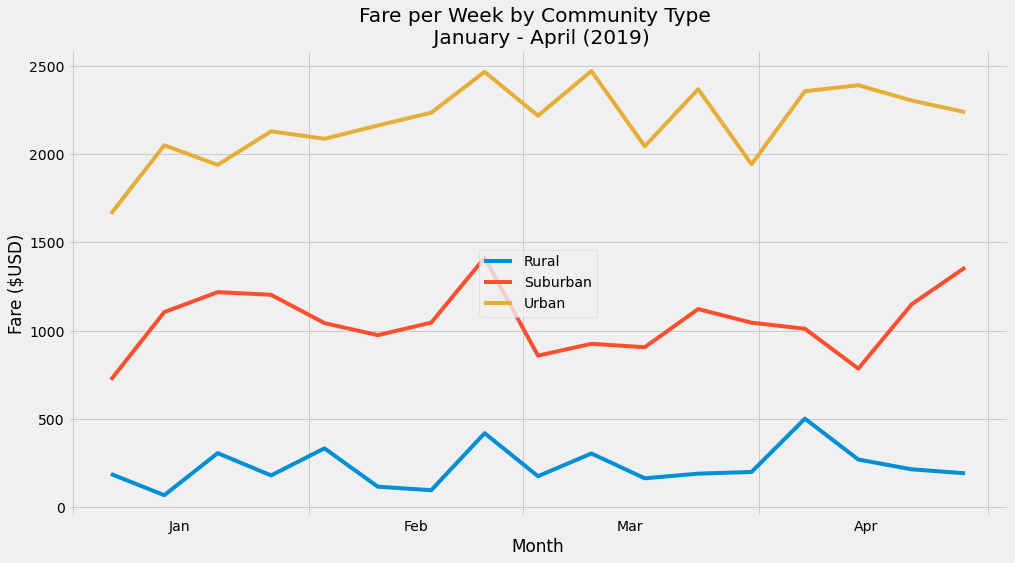

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(weekly_sum, label = ("Rural","Suburban","Urban"))
ax.set_xlabel('Month')
ax.set_ylabel('Fare ($USD)')
ax.set_title('Fare per Week by Community Type \n January - April (2019)')
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))


ax.legend(loc='center')

plt.savefig(r"C:\Users\Artsy\Desktop\PyBer_Analysis\analysis\PyBer_fare_summary.png")